<a href="https://colab.research.google.com/github/Sarikavidya/catvsdog/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255) 
  
train_generator = train_datagen.flow_from_directory('/home/dataset/train', target_size =(150, 150),  
                                                      batch_size = 20, class_mode = "binary") 
  
validation_generator = test_datagen.flow_from_directory('/home/dataset/test', target_size =(150, 150), 
                                                      batch_size = 20, class_mode = "binary")

Found 16 images belonging to 3 classes.
Found 0 images belonging to 1 classes.


In [ ]:
from keras import models 
from keras import layers 
  
model = models.Sequential() 
  
model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(64, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Flatten()) 
  
model.add(layers.Dense(512, activation ='relu')) 
model.add(layers.Dense(1, activation ="sigmoid")) 
  
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from keras import optimizers 

model.compile(loss ="binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4), 
metrics =['accuracy']) 

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, 
validation_data = validation_generator, validation_steps = 50) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 1s 163us/step - loss: -9.1769 - accuracy: 0.5000


(1, 150, 150, 3)


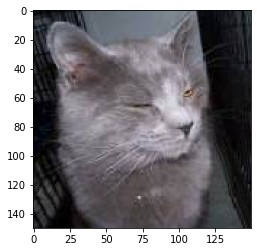

In [ ]:
from keras.preprocessing import image 
import numpy as np 
  
# Pre-processing the image 
img = image.load_img('/home/dataset/test/cat.10435.jpg', target_size = (150, 150)) 
img_tensor = image.img_to_array(img) 
img_tensor = np.expand_dims(img_tensor, axis = 0) 
img_tensor = img_tensor / 255.
  
# Print image tensor shape 
print(img_tensor.shape) 
  
# Print image 
import matplotlib.pyplot as plt 
plt.imshow(img_tensor[0]) 
plt.show() 

(1, 148, 148, 32)


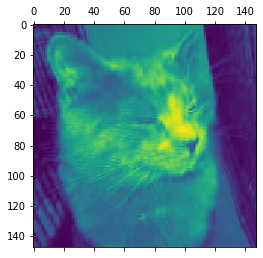

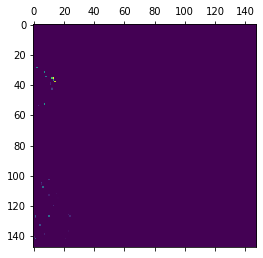

In [ ]:
# Outputs of the 8 layers, which include conv2D and max pooling layers 
layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs = model.input, outputs = layer_outputs) 
activations = activation_model.predict(img_tensor) 

# Getting Activations of first layer 
first_layer_activation = activations[0] 

# shape of first layer activation 
print(first_layer_activation.shape) 

# 6th channel of the image after first layer of convolution is applied 
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis') 

# 15th channel of the image after first layer of convolution is applied 
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis') 


In [ ]:
model.save("model.h5")
